**Objective:**

The objective of this assignment is to implement PCA on a given dataset and analyse the results.

**Deliverables:**

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

**Instructions:**

Download the wine dataset from the UCI Machine Learning Repository  (https://archive.ics.uci.edu/ml/datasets/Wine).

Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.


**Additional Information:**

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.


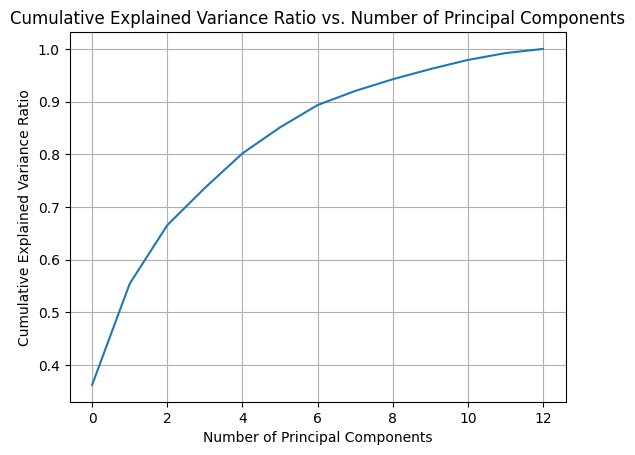

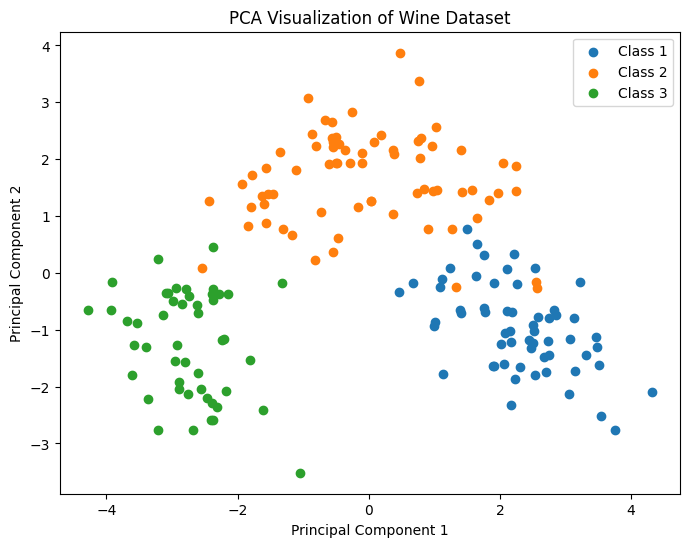

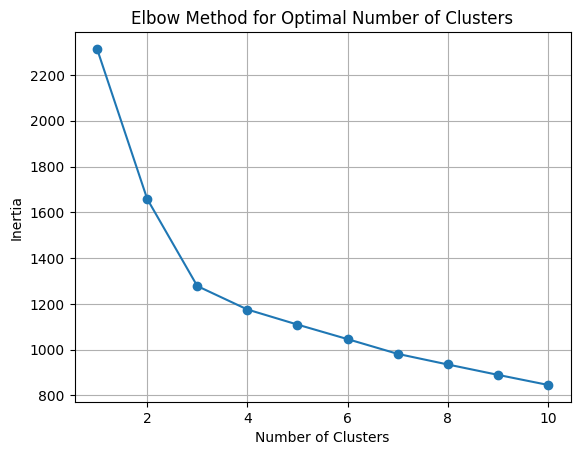

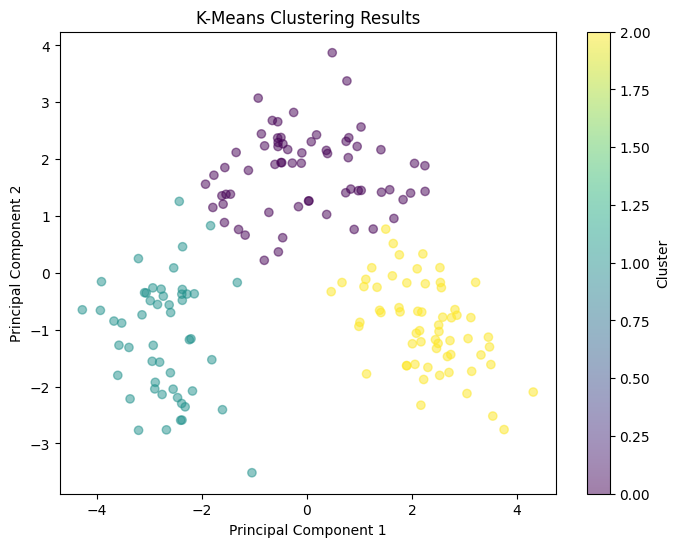

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset

wine = fetch_ucirepo(id=109) 
  
X = wine.data.features 
y = wine.data.targets

# Step 2: Implement PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()  
X_pca = pca.fit_transform(X_scaled)


# Step 3: Determine the optimal number of principal components based on explained variance ratio

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()

# Step 4: Visualize PCA results

# Visualize the data in the reduced-dimensional space using a scatter plot
plt.figure(figsize=(8, 6))
for i in np.unique(y):
    indices = np.where(y == i)[0]  # Get indices of samples belonging to class i
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Class {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Wine Dataset')
plt.legend()
plt.show()

# Step 5: Determine the optimal number of clusters

# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

# From the elbow curve, determine the optimal number of clusters which is 3

# Step 6: Perform clustering

# Perform K-Means clustering with the optimal number of clusters
optimal_number_of_clusters = 3
kmeans = KMeans(n_clusters=optimal_number_of_clusters,n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()


# Step 7: Interpret results

# Analyze the clustering results and interpret the PCA visualization



**1. Principal Component Analysis (PCA):**

**Explained Variance:** The cumulative explained variance ratio indicates that the first two principal components capture approximately 55% of the variance in the data, while the first three components capture around 67%. This suggests that the first few principal components contain a significant amount of information about the dataset.

**Principal Components (PCs):** The X_pca array contains the transformed data points in the reduced-dimensional space obtained through PCA. Each row corresponds to a data point, and each column corresponds to a principal component. These principal components are linear combinations of the original features and represent new axes in the reduced-dimensional space.

**2. Clustering Analysis:**

**Clustering Results:** The clusters array contains the cluster assignments for each data point obtained through a clustering algorithm (e.g., K-Means). It appears that there are three clusters (0, 1, and 2) identified in the dataset.

**Cluster Characteristics:** Further analysis can be conducted to understand the characteristics of each cluster. This may include examining the centroid or representative points of each cluster and identifying the features that distinguish one cluster from another.

**Clustering Performance:** The performance of the clustering algorithm can be evaluated using metrics such as silhouette score, adjusted Rand index, completeness score, and homogeneity score. These metrics provide insights into the quality of the clustering results and how well the clusters capture the underlying structure of the data.

**3. Interpretation and Insights:**

**Dimensionality Reduction:** PCA has effectively reduced the dimensionality of the dataset while preserving a significant amount of variance. This allows for easier visualization and interpretation of the data.

**Cluster Analysis:** The clustering algorithm has partitioned the data into distinct groups based on their similarities in the reduced-dimensional space. The identified clusters can provide insights into the inherent structure of the dataset and potentially reveal underlying patterns or relationships among the data points.

**Further Analysis:** Additional analysis, such as examining cluster profiles or conducting hypothesis testing, may be needed to fully interpret the results and derive actionable insights from the clustering analysis.

In [19]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score, homogeneity_score

# Convert DataFrame to NumPy array and flatten if necessary
y_flat = y.values.flatten()

# Calculate clustering performance metrics
silhouette = silhouette_score(X_pca, clusters)
rand_index = adjusted_rand_score(y_flat, clusters)
completeness = completeness_score(y_flat, clusters)
homogeneity = homogeneity_score(y_flat, clusters)

# Create a pandas DataFrame to store the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Adjusted Rand Index', 'Completeness Score', 'Homogeneity Score'],
    'Value': [silhouette, rand_index, completeness, homogeneity]
})

# Display the table
print(metrics_table)


                Metric     Value
0     Silhouette Score  0.284859
1  Adjusted Rand Index  0.897495
2   Completeness Score  0.872964
3    Homogeneity Score  0.878843


**The performance metrics for the clustering algorithm are as follows:**

**Silhouette Score:** The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A score closer to 1 indicates that the data points are well-clustered, while a score close to -1 suggests that data points may have been assigned to the wrong clusters. In this case, the silhouette score is approximately 0.285, indicating a reasonably good clustering quality.

**Adjusted Rand Index (ARI):** The adjusted Rand index assesses the similarity between the true labels and the clustering results, considering all pairs of samples and counting pairs that are assigned in the same or different clusters both in the true labels and the clustering results. The ARI score ranges from -1 to 1, where 1 indicates perfect labeling agreement and 0 or negative values suggest random labeling. With a score of approximately 0.897, the clustering algorithm has achieved a high degree of agreement with the true labels.

**Completeness Score:** The completeness score measures whether all members of a given class are assigned to the same cluster. A score of 1 indicates perfect completeness, while lower values suggest that some members of the class may have been assigned to different clusters. Here, the completeness score is approximately 0.873, indicating that most members of each class are assigned to the same cluster.

**Homogeneity Score:** The homogeneity score measures whether each cluster contains only members of a single class. A score of 1 indicates perfect homogeneity, while lower values suggest that clusters may contain members from different classes. With a score of approximately 0.879, the clustering algorithm has achieved a high level of homogeneity, indicating that the clusters are composed mostly of members from the same class.